Data Source: Penn World Tables, Bilateral Trade Statistics from AEA Website for Frankel and Romer (1999) –updated with Bilateral Trade data.
For this project, I am using Argentina demographics and bilateral trade data collected from the Penn World Data to examine if opennes to trade lead to growth. This data is only restricted o Argentina and it major trade partners. The hypothese I will be focusing on in this particular project is that "Argentina opening to trade will bring growth by increasing the country's real gdp per capita. 
In this part of the project I am renaming the variable  and generating new ones to worth with. I am also running different type of estimations to see the one that works best in explaining the variables.  

In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
#reading the dataset.
df = pd.read_stata('../ECON628-01-acissokho/Argentina_Master.dta')

In [3]:
#Showinf the first 3 observations of the data. 
df.head(3)

,country,partner,year,export,import,worldexport,worldimport,realgdp,distance,arg_pop,...,landarea,countrycode,v_x,v_m,v_gdp,q_x,q_m,q_gdp,pop,_merge
0,Argentina,Greece,1993,61045.718750,10389.741211,13117745.0,16772908.0,2.367536e+11,7253,33.982037,...,50952,ARG,16341.0,22028.0,236505.0,50576.839174,65549.708242,412799.287747,33982035.0,matched (3)
1,Argentina,Bangladesh,1993,25873.412109,2670.836914,13117745.0,16772908.0,2.367536e+11,10424,33.982037,...,55599,ARG,16341.0,22028.0,236505.0,50576.839174,65549.708242,412799.287747,33982035.0,matched (3)
2,Argentina,Indonesia,1993,73984.093750,26308.072266,13117745.0,16772908.0,2.367536e+11,9468,33.982037,...,742308,ARG,16341.0,22028.0,236505.0,50576.839174,65549.708242,412799.287747,33982035.0,matched (3)


In [4]:
#Checking on the size of the data; columns and rows.
df.shape

(152, 22)

In [5]:
#Checking on the types of odservations that are in the data.
df.dtypes

country          object
partner          object
year              int16
export          float32
import          float32
worldexport     float32
worldimport     float32
realgdp         float64
distance          int16
arg_pop         float32
population      float32
arg_area          int32
landarea          int32
countrycode      object
v_x             float64
v_m             float64
v_gdp           float64
q_x             float64
q_m             float64
q_gdp           float64
pop             float64
_merge         category
dtype: object

In [6]:
df.info

<bound method DataFrame.info of        country     partner  year        export        import  worldexport  \
0    Argentina      Greece  1993  6.104572e+04  1.038974e+04   13117745.0   
1    Argentina  Bangladesh  1993  2.587341e+04  2.670837e+03   13117745.0   
2    Argentina   Indonesia  1993  7.398409e+04  2.630807e+04   13117745.0   
3    Argentina       Chile  1993  5.918486e+05  7.019244e+05   13117745.0   
4    Argentina      Brazil  1993  2.814179e+06  3.568422e+06   13117745.0   
5    Argentina   Gautemala  1993  1.489067e+04  7.355670e+02   13117745.0   
6    Argentina       India  1993  3.794059e+04  3.543630e+04   13117745.0   
7    Argentina     Bolivia  1993  1.779442e+05  1.078811e+05   13117745.0   
8    Argentina     Bolivia  1994  1.923234e+05  1.449222e+05   15838651.0   
9    Argentina       Chile  1994  9.988073e+05  8.287930e+05   15838651.0   
10   Argentina  Bangladesh  1994  2.221735e+04  2.040952e+03   15838651.0   
11   Argentina      Brazil  1994  3.654814e+

In [7]:
#Checking to see if there is any missing values in the data.
df.isnull().sum()

country        0
partner        0
year           0
export         0
import         0
worldexport    0
worldimport    0
realgdp        0
distance       0
arg_pop        0
population     0
arg_area       0
landarea       0
countrycode    0
v_x            0
v_m            0
v_gdp          0
q_x            0
q_m            0
q_gdp          0
pop            0
_merge         0
dtype: int64

In [8]:
#Summary of the data 
df.describe()

,year,export,import,worldexport,worldimport,realgdp,distance,arg_pop,population,arg_area,landarea,v_x,v_m,v_gdp,q_x,q_m,q_gdp,pop
count,152.000000,1.520000e+02,1.520000e+02,152.0,152.0,1.520000e+02,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,1.520000e+02
mean,2002.000000,1.560108e+06,1.270504e+06,37550620.0,31329870.0,3.161542e+11,5532.875000,37.536556,208.093277,1.073518e+06,7.633938e+05,118134.717925,98170.984670,5.815904e+05,112763.483378,107566.623730,531660.354784,3.753654e+07
std,5.495332,2.941480e+06,3.522112e+06,19716300.0,16267372.0,1.016807e+11,3921.309687,2.044006,344.465912,1.630372e+00,1.031505e+06,112414.772334,94697.578143,4.550435e+05,36776.197123,40494.605125,113681.422453,2.044007e+06
min,1993.000000,1.204242e+04,1.322630e+02,13117745.0,8989546.0,1.236075e+11,709.000000,33.982037,7.138204,1.073518e+06,4.204200e+04,16341.000000,22028.000000,2.365050e+05,50576.839174,44076.762937,410583.658412,3.398204e+07
25%,1997.000000,9.118931e+04,6.659670e+03,23809628.0,20321126.0,2.367536e+11,1375.750000,35.714928,11.174151,1.073518e+06,5.443725e+04,28381.400000,30148.400000,2.721498e+05,86279.116919,79398.824919,446867.163258,3.571493e+07
50%,2002.000000,2.596163e+05,1.076448e+05,26610056.0,25507944.0,3.296712e+11,5622.000000,37.657341,64.957494,1.073518e+06,3.530465e+05,86552.430000,40010.300000,3.125801e+05,102517.467140,102562.618222,485869.325937,3.765734e+07
75%,2007.000000,1.145453e+06,4.953162e+05,55672120.0,38786164.0,3.621338e+11,9554.750000,39.368065,195.373608,1.073518e+06,8.623708e+05,200079.815542,165230.165361,8.124558e+05,147825.005196,131097.024235,626900.404288,3.936807e+07
max,2011.000000,1.734703e+07,2.218104e+07,84051152.0,74319320.0,5.577273e+11,10424.000000,40.764561,1241.491943,1.073518e+06,3.287597e+06,401992.370935,359773.648172,1.842022e+06,176619.082549,206895.130598,802142.130980,4.076456e+07


In [57]:
#Renaming variables
df = df.rename(index=str, columns={ "year": "Year", "v_x": "Exports_at_current_national_prices", 
                                                  "v_m": "Imports_at_current_national_prices","v_gdp": "GDP_at_current_national_prices",
                                                  "q_x":"Exports_at_constant_national_2005prices", "q_m": "Imports_at_constant_national_2005prices",
                                                 "q_gdp": "GDP_at_constant_national_2005prices","import": "Import"})


In [58]:
#Creating new variable
df['rgdpcap']=(df['GDP_at_constant_national_2005prices']/df['pop'])


In [11]:
## Log of rgdpcap
df['logrgdpcap'] = df.rgdpcap.apply(np.log)

## Create trade share
df['tradeshare0'] = (df['Exports_at_current_national_prices']+df['Imports_at_current_national_prices'])

df['tradeshare'] = (df['tradeshare0']/df['GDP_at_current_national_prices'])

In [12]:
#Create log of trade share
df['logtradeshare'] = df.tradeshare.apply(np.log)

In [13]:
#Create log of population
df['logpop'] = (df['pop'].apply(np.log))   

In [14]:
#Create log of area. Command

df['logarea'] = df.arg_area.apply(np.log)

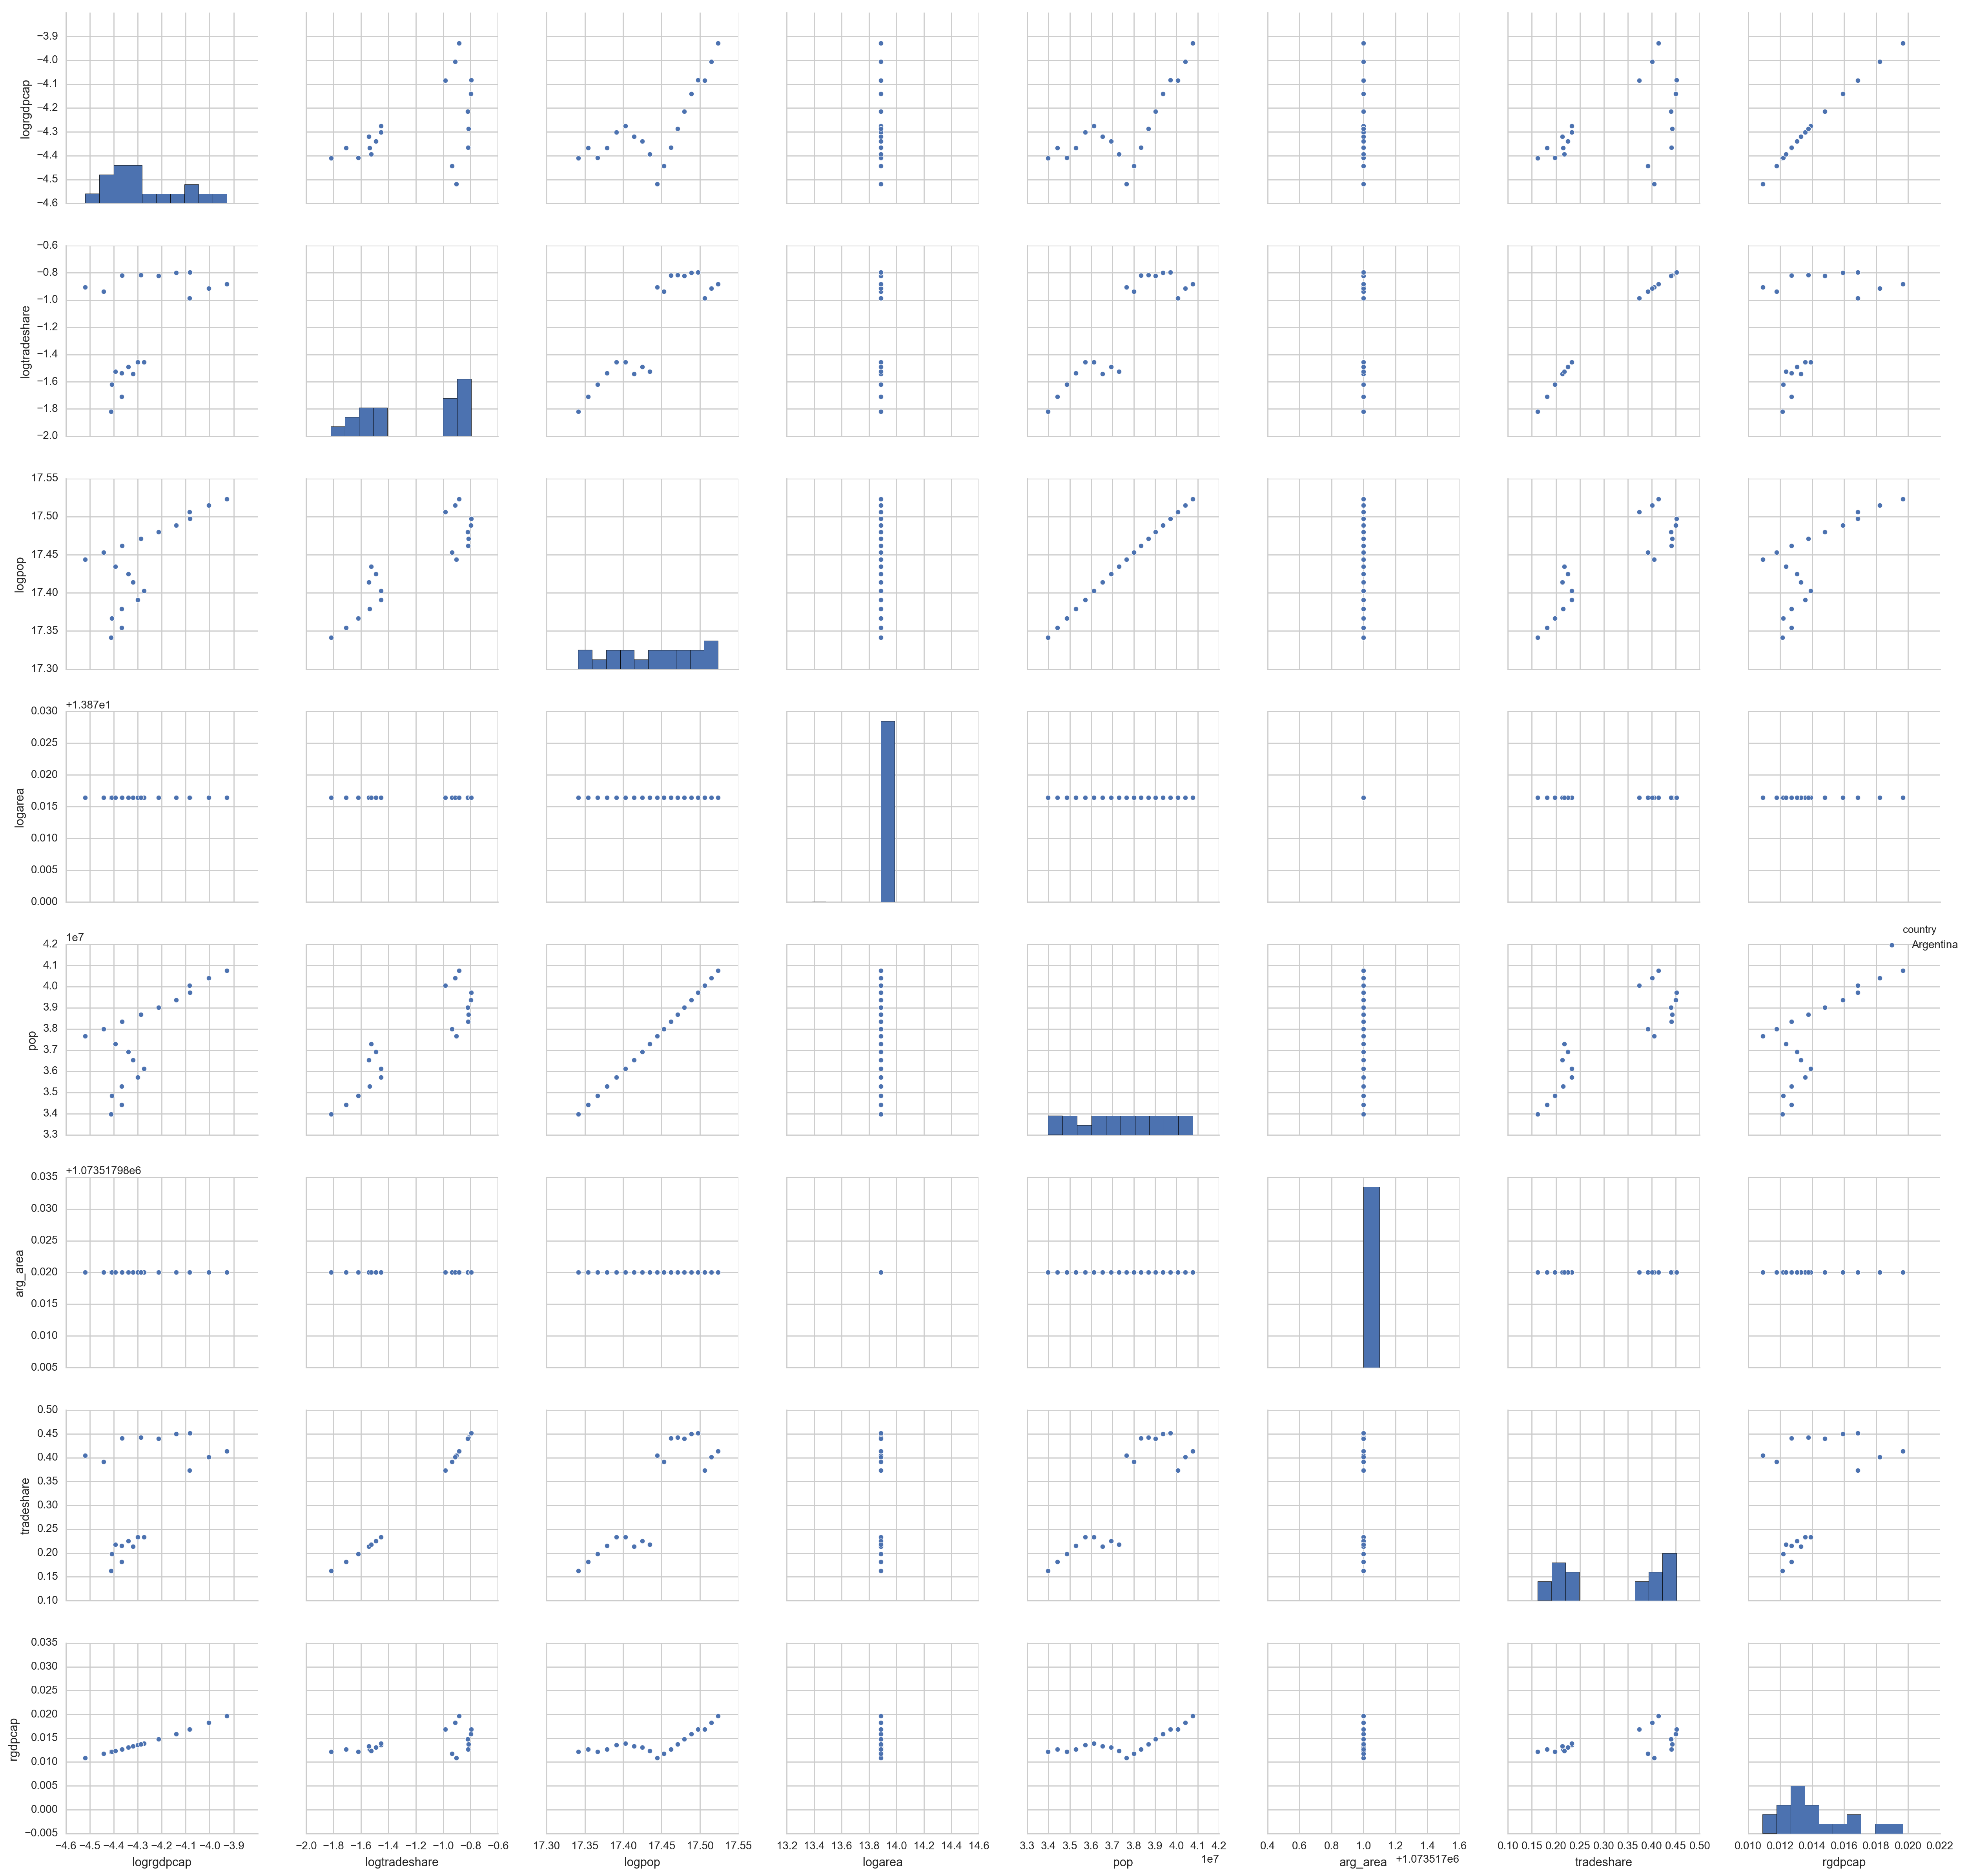

In [15]:
#Visualizing the variables
sns.pairplot(data=df, 
             vars=['logrgdpcap', 'logtradeshare', 'logpop', 'logarea', 'pop', 'arg_area','tradeshare','rgdpcap'], 
             hue='country', size=3)
plt.tight_layout()
plt.show()

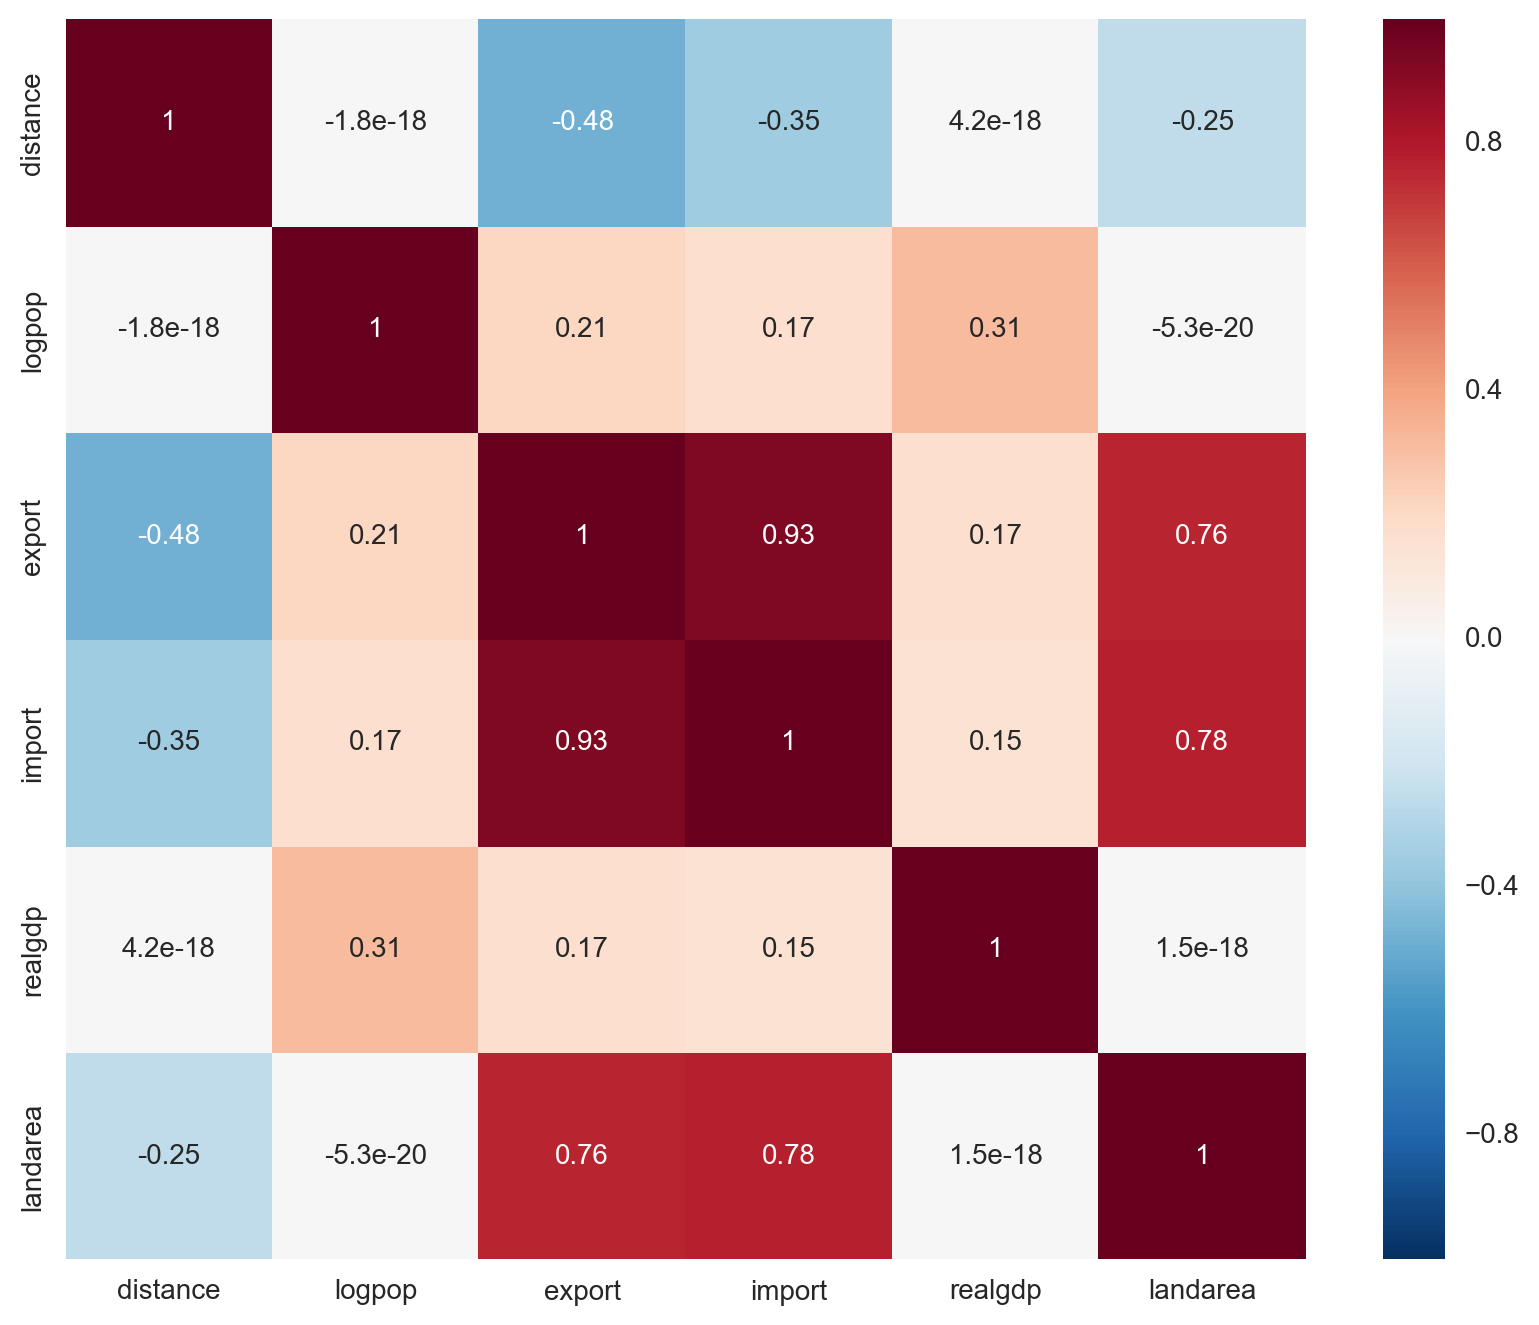

In [16]:
#To view if there exist any correlation among the variables. 
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df[['distance','logpop','export','import','realgdp','landarea']].corr(),annot=True, ax=ax)
plt.show()

It can be observed thta some variables are strongly correlated to each other. For example: Import and export to land area. Export to import, import to export. 

In [17]:
#Using Skelearn - build a linear regression predicting real gdp per capita/ openness  from three of the columns.
y = df.logrgdpcap
X = df[['logtradeshare','logarea','logpop']]

# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
Xn = ss.fit_transform(X)

## Print the shapes and types of your target and predictore
print (y.shape), (type(y))
print ("\n=====\n")
print (Xn.shape), (type(Xn))

(152,) <class 'pandas.core.series.Series'>

=====

(152, 3) <type 'numpy.ndarray'>


In [18]:
## import packages 
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

## train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it 
## without specifying random_state, you will get a different result, this is expected behavior.

Xtrain, Xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.30, random_state=10)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 


(106, 3) (46, 3) (106,) (46,)


In [19]:
## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(Xtrain, ytrain)


## predict values => you predict on the test, I am predict on the train so we can see how the model performs
ytrain_pred = lr.predict(Xtrain)
ytest_pred = lr.predict(Xtest)
# print(lr.coef_)
# print "====\n"

## Cross validate = 10
linreg_scores = cross_val_score(lr, Xtrain, ytrain, cv=10)

## Print the R^2
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[-0.24780777  0.83355381  0.823947    0.6339222   0.46793652  0.84252609
 -0.18108983  0.82556244  0.45563588  0.59883539]
Average R^2 OLS score: 0.505


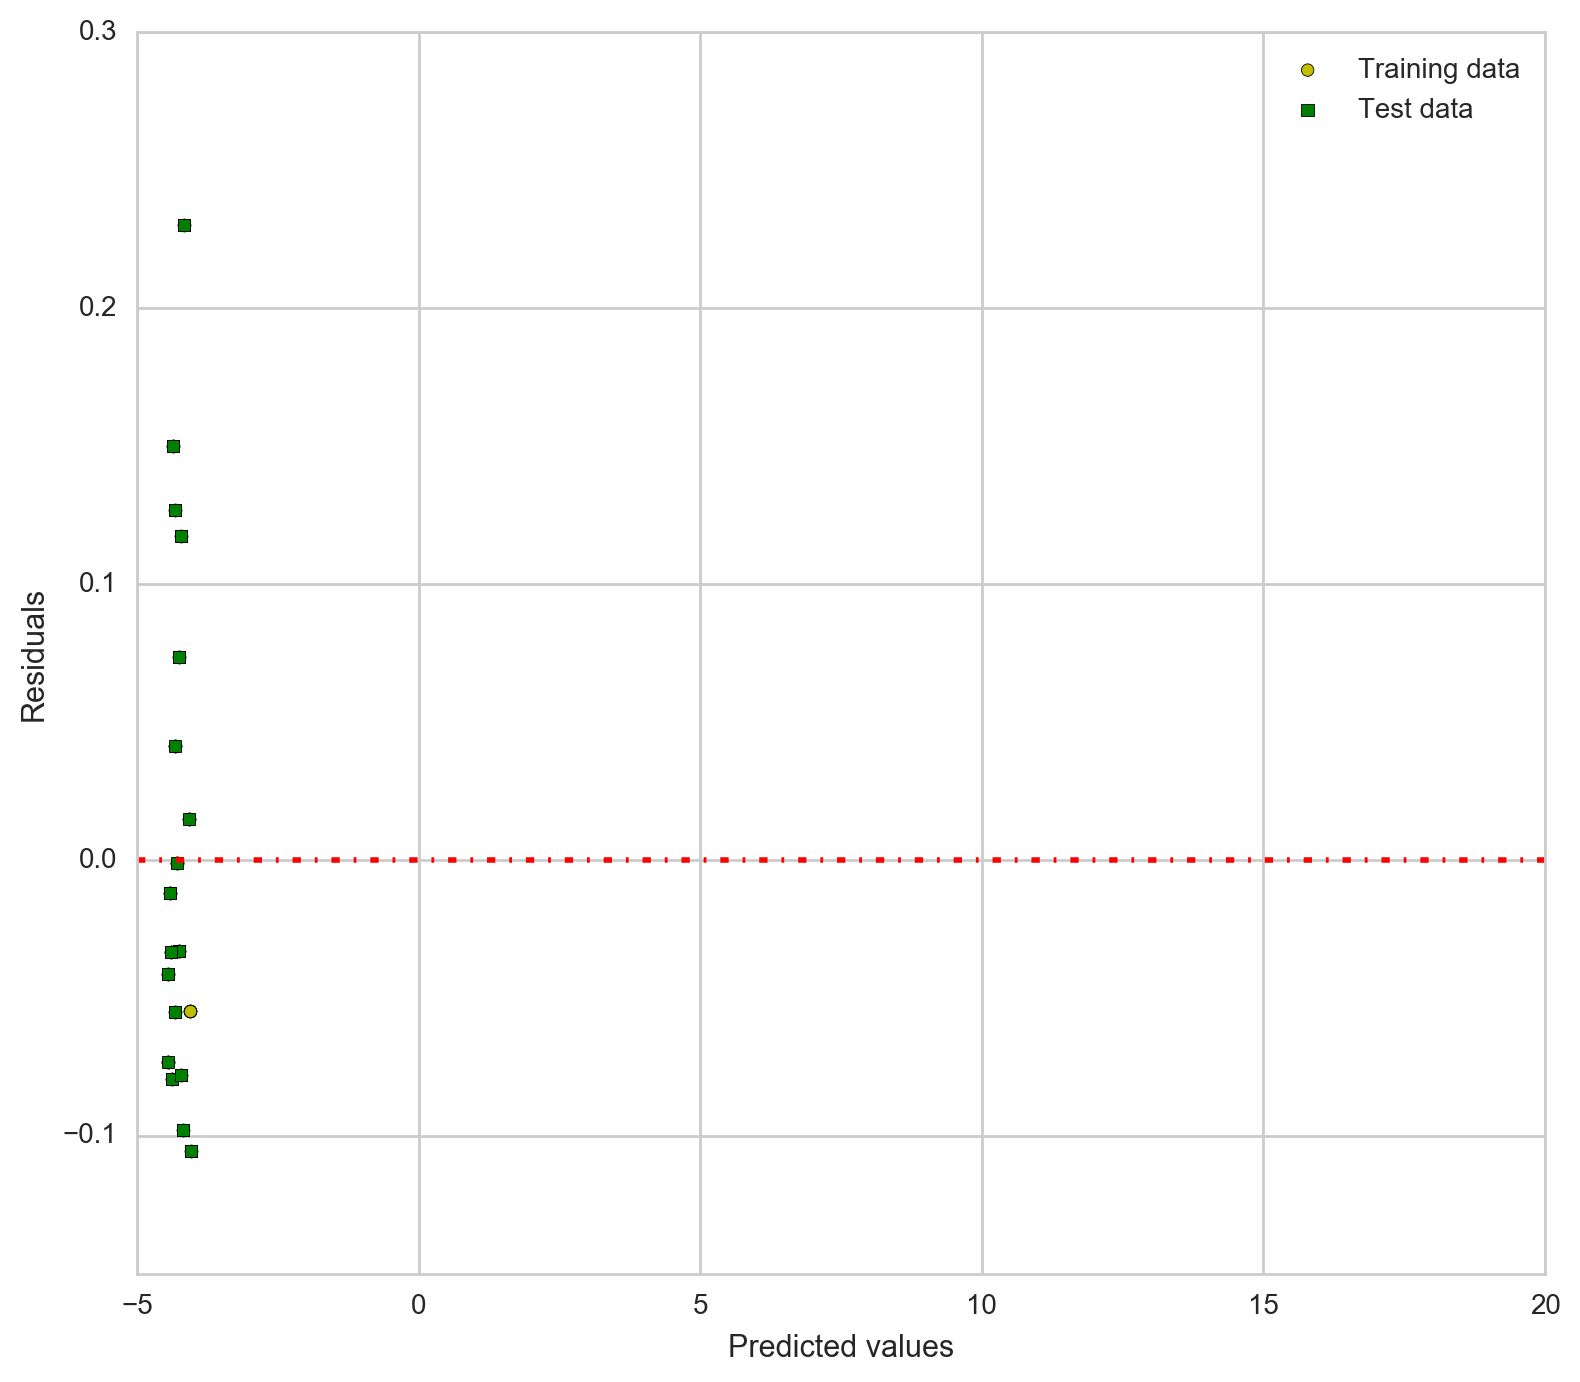

In [20]:
## Here we are plotting the residuals vs the predicted values for our train and test data set
## Recall residual plots are the graphical diagnosis to detect nonlinearity, outliers and and if the
## error terms are randomly distributed

fig = plt.figure(figsize=(8,7))

plt.scatter(ytrain_pred,  ytrain_pred - ytrain,
            c='y', marker='o', label='Training data')

plt.scatter(ytest_pred,  ytest_pred - ytest,
            c='g', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-5, xmax=20, lw=2, linestyles= '-.', color='red')
plt.xlim([-5, 20])
plt.tight_layout()

plt.show()

In [21]:
## Use the R^2 and MSE to see how the model is performing on train and test data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE - OLS train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred),
        mean_squared_error(ytest, ytest_pred)))
print('R^2 0LS train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred),
        r2_score(ytest, ytest_pred)))

MSE - OLS train: 0.007, test: 0.012
R^2 0LS train: 0.702, test: 0.531


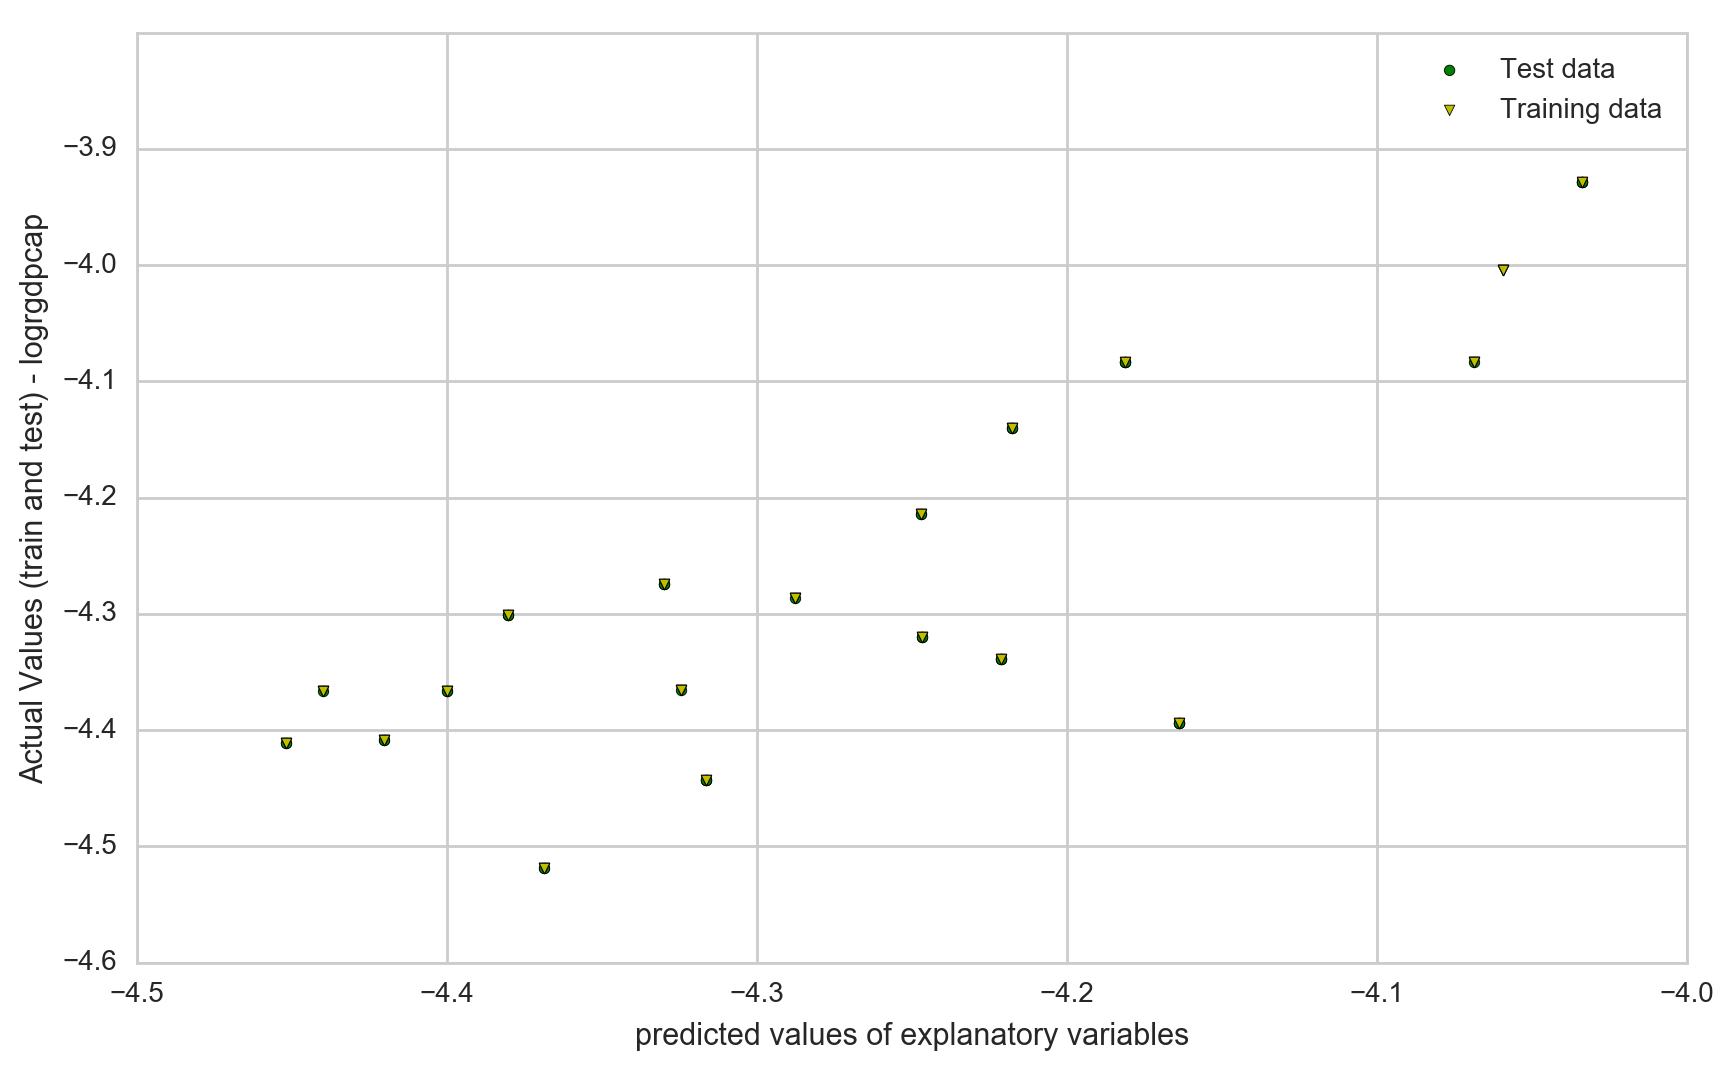

In [22]:
## Here we are plotting the predicted values for our train and test data set
fig = plt.figure(figsize=(10,6))
plt.scatter(ytest_pred, ytest, s=14, c='g', marker='o', label='Test data')
plt.scatter(ytrain_pred, ytrain, s=14, c='y', marker='v', label='Training data')
plt.xlabel("predicted values of explanatory variables")
plt.ylabel("Actual Values (train and test) - logrgdpcap")
plt.legend(loc='upper right')
plt.show()

In [23]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [24]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xtrain, ytrain)
print (optimal_ridge.alpha_)

2.67384161584


In [25]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(Xtrain, ytrain)
ytrain_pred_ridge = ridge.predict(Xtrain)
ytest_pred_ridge = ridge.predict(Xtest)
# print(ridge.coef_)
# print "=====\n"


## Cross validate = 10
ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=10)
## Print the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))

[-0.15412092  0.83376088  0.78459791  0.62150486  0.45235484  0.77096139
  0.0722254   0.75628763  0.54550659  0.60739271]
Average R^2 Ridge score: 0.529


In [26]:
print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_ridge),
        mean_squared_error(ytest, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_ridge),
        r2_score(ytest, ytest_pred_ridge)))

MSE - Ridge train: 0.007, test: 0.011
R^2 - Ridge train: 0.690, test: 0.552


In [27]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xtrain, ytrain)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000117673056774


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [28]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(Xtrain, ytrain)
ytrain_pred_lasso = lasso.predict(Xtrain)
ytest_pred_lasso = lasso.predict(Xtest)
# print(lasso.coef_)
# print "====\n"

lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

[-0.24375527  0.83382431  0.82333153  0.63405911  0.46795958  0.84060374
 -0.1730233   0.82373218  0.45889237  0.59932735]
Average R^2 Lasso score: 0.506


In [29]:
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_lasso),
        mean_squared_error(ytest, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_lasso),
        r2_score(ytest, ytest_pred_lasso)))

MSE - Lasso train: 0.007, test: 0.012
R^2 - Lasso train: 0.702, test: 0.532


In [30]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xtrain, ytrain)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00104535112625
0.111020408163


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [31]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(Xtrain, ytrain)

## predict
ytrain_pred_enet = enet.predict(Xtrain)
ytest_pred_enet = enet.predict(Xtest)
# print(enet.coef_)
# print "=====\n"

## Cross validate the scores and print the mean of the scores
enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=10)
print enet_scores
print "Average R^2 ElasticNet score: %.3f" % (np.mean(enet_scores))

[-0.23792926  0.83420744  0.82232815  0.63443042  0.46801426  0.83802035
 -0.16058561  0.82126662  0.4634774   0.60000893]
Average R^2 ElasticNet score: 0.508


In [32]:
print('MSE - ElasticNet train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_enet),
        mean_squared_error(ytest, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_enet),
        r2_score(ytest, ytest_pred_enet)))

MSE - ElasticNet train: 0.007, test: 0.012
R^2 - ElasticNet train: 0.702, test: 0.533


In [33]:
# model residuals on training data:
ols_resd_train  = ytrain - ytrain_pred
ridge_resd_train = ytrain - ytrain_pred_ridge
lasso_resd_train = ytrain - ytrain_pred_lasso
enet_resd_train = ytrain - ytrain_pred_enet

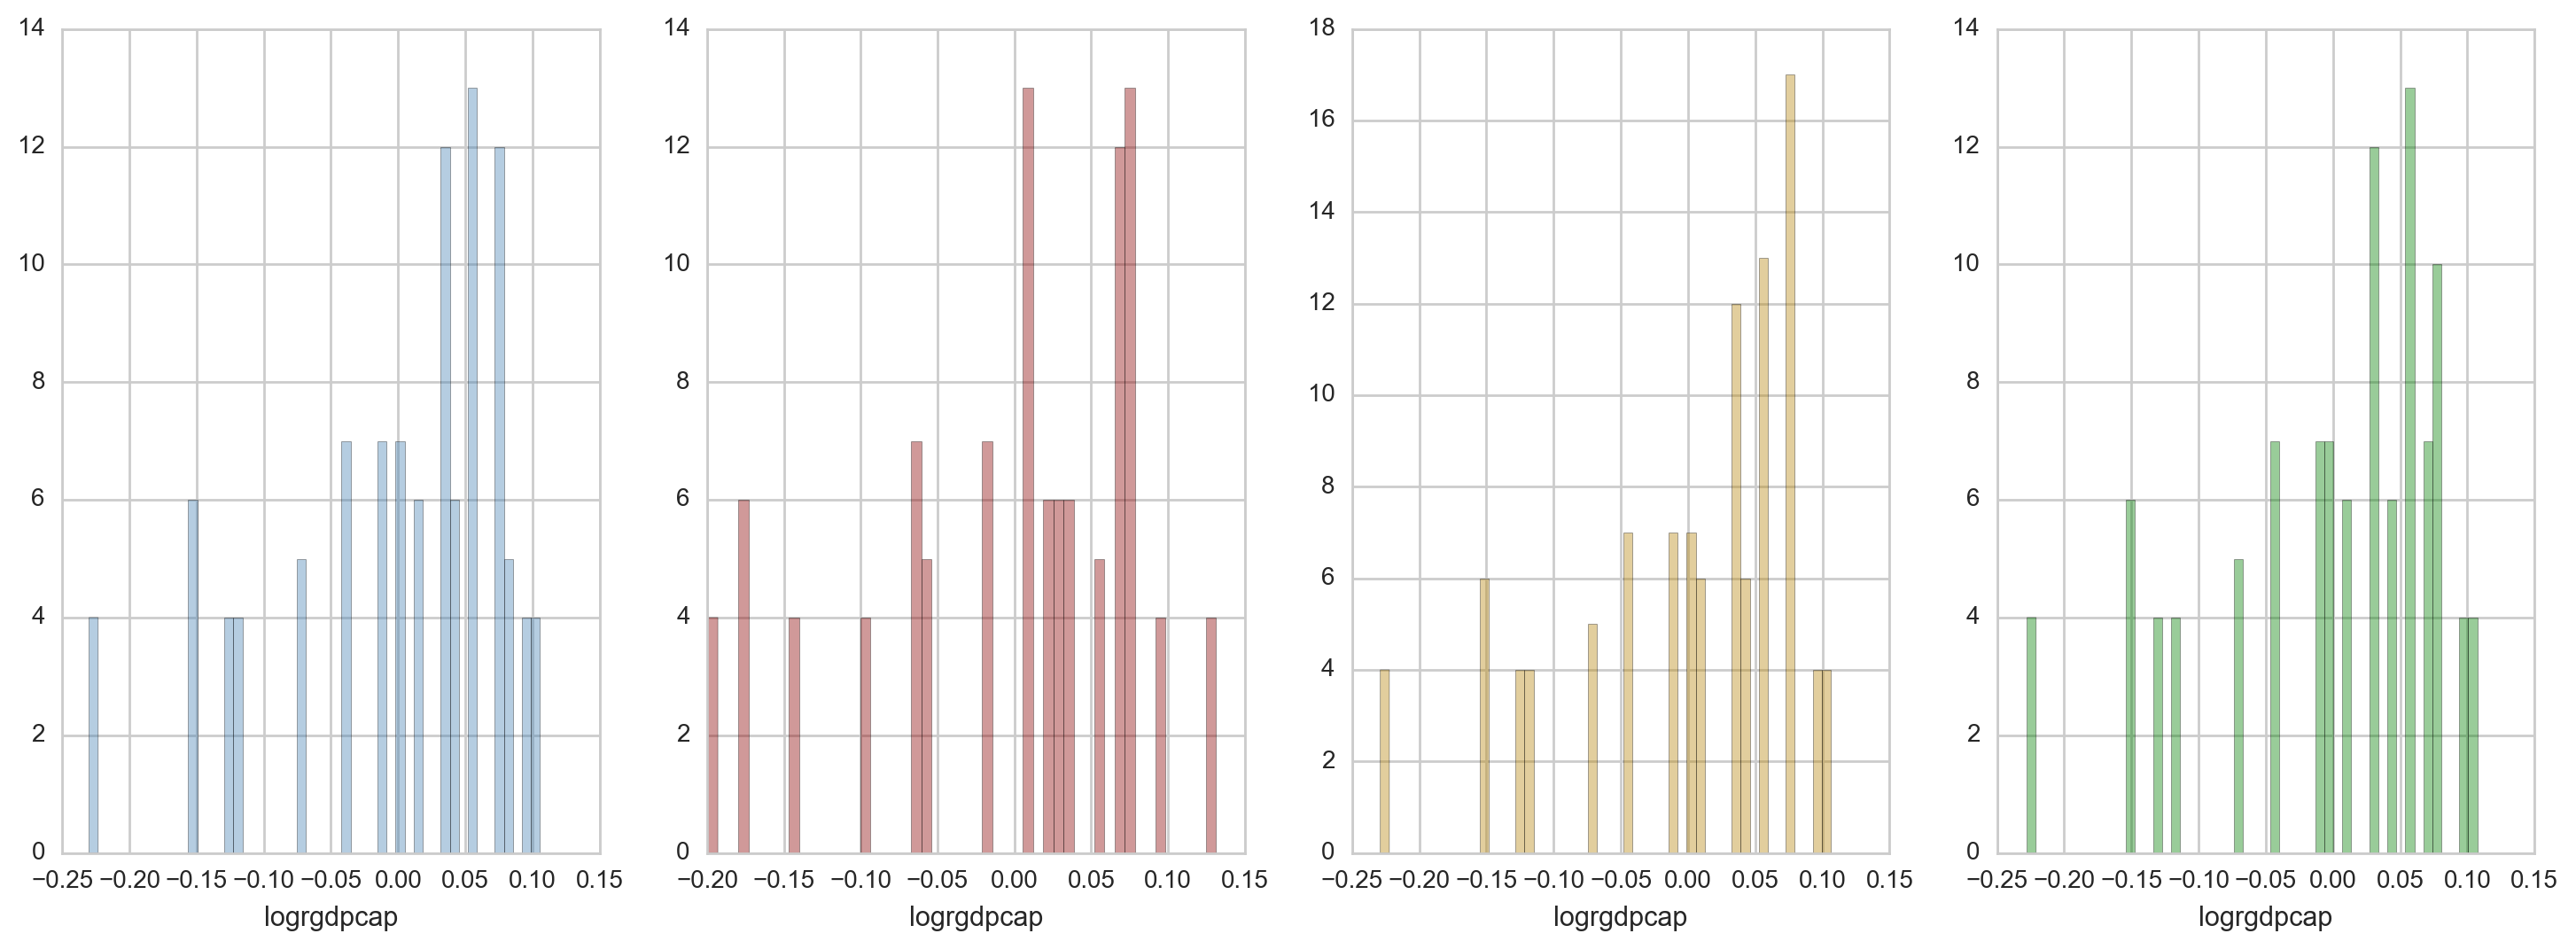

In [34]:
fig, axarr = plt.subplots(1, 4, figsize=(18, 6))

sns.distplot(ols_resd_train, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='OLS residuals')


sns.distplot(ridge_resd_train, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Ridge residuals')


sns.distplot(lasso_resd_train, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')

sns.distplot(enet_resd_train, bins=50, hist=True, kde=False, 
             color='g', ax=axarr[3], label='ElasticNet residuals')

plt.show()


In [35]:
# model residuals on test data:
ols_resd_test  = ytest - ytest_pred
ridge_resd_test = ytest - ytest_pred_ridge
lasso_resd_test = ytest - ytest_pred_lasso
enet_resd_test = ytest - ytest_pred_enet

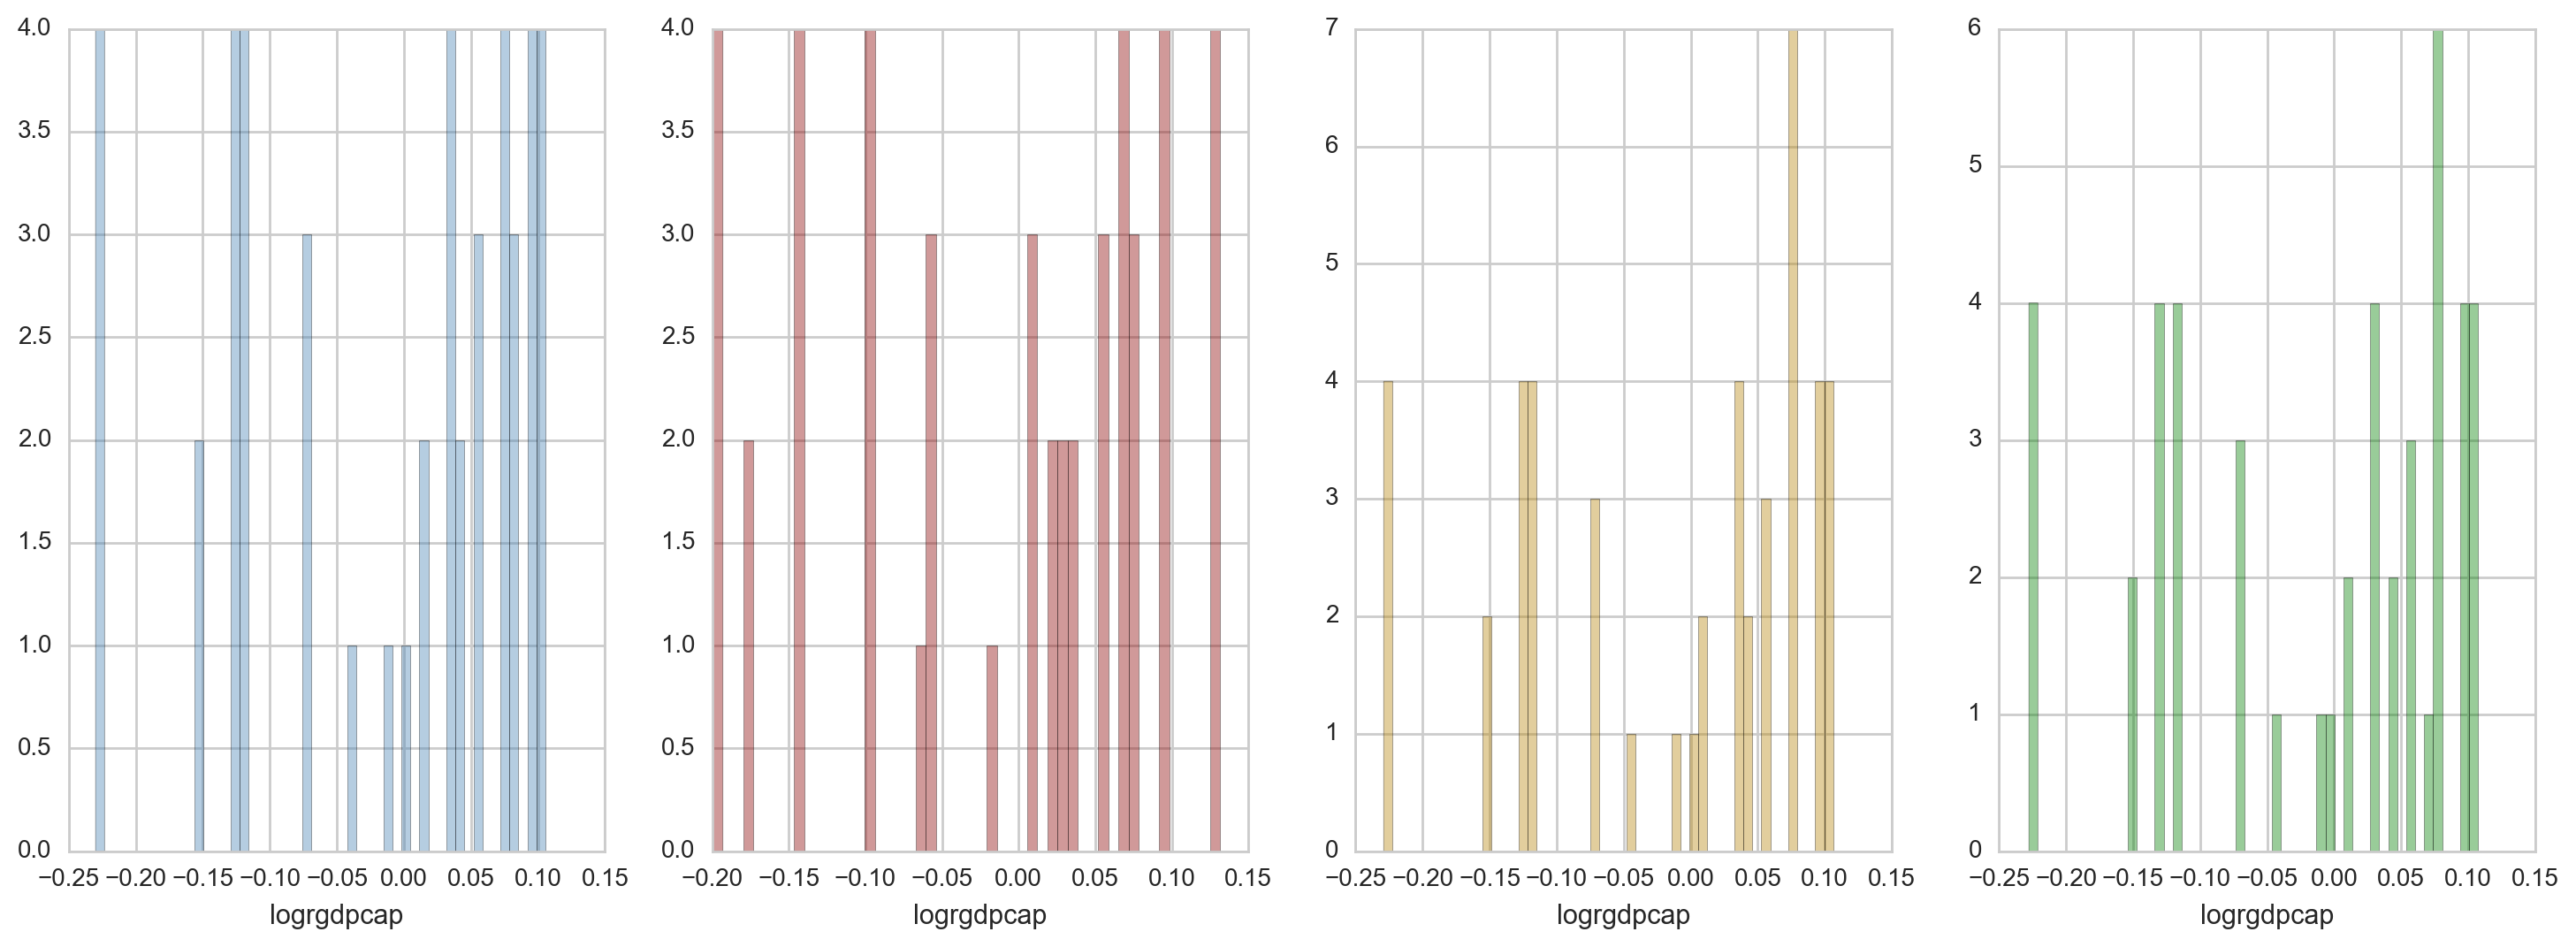

In [36]:
fig, axarr = plt.subplots(1, 4, figsize=(18, 6))

sns.distplot(ols_resd_test, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='OLS residuals')


sns.distplot(ridge_resd_test, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Ridge residuals')


sns.distplot(lasso_resd_test, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')

sns.distplot(enet_resd_test, bins=50, hist=True, kde=False, 
             color='g', ax=axarr[3], label='ElasticNet residuals')

plt.show()


Based on the above estimations, it can be observe the results on the MSE and Rsquared are slightly the same. However,the ols estimation performs best in explaining the data, because the Rsquared from the ols estimation is high compared to the rests alhough the MSE are basically the same.  

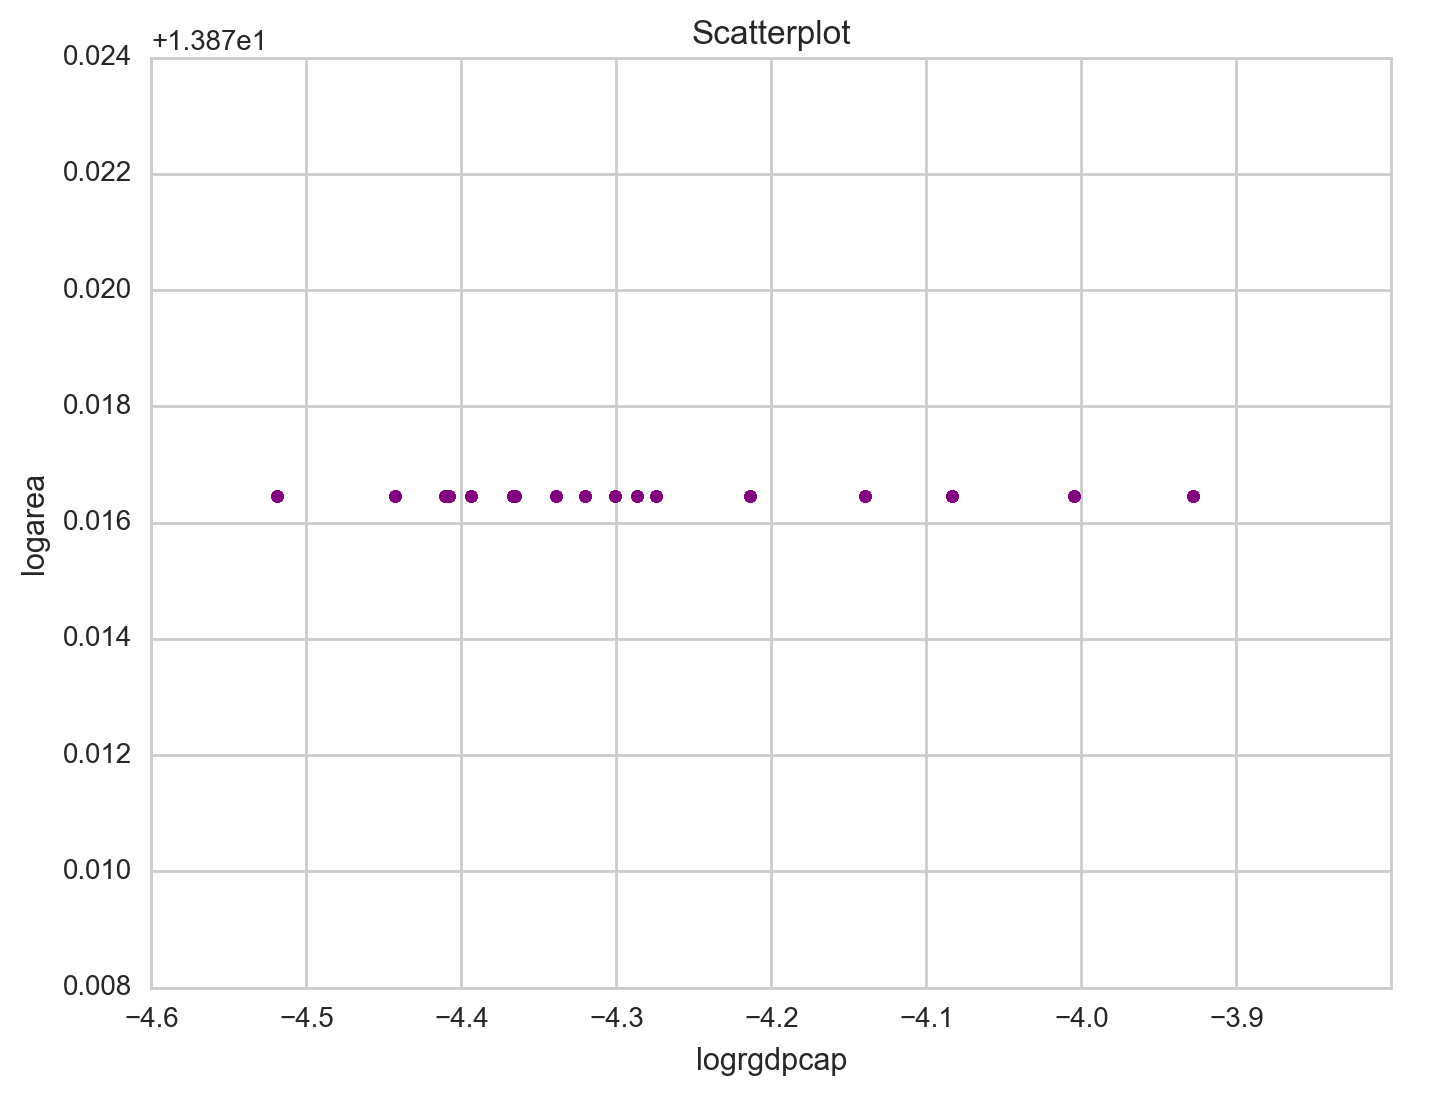

In [37]:
#examining if there is any relation between the real gdp per capita variable and the area variable. 
logrgdpcap = df.logrgdpcap
logarea = df.logarea

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(logrgdpcap, logarea, fit_reg=False, color='purple', ax=ax)

ax.set_title('Scatterplot')
plt.show()

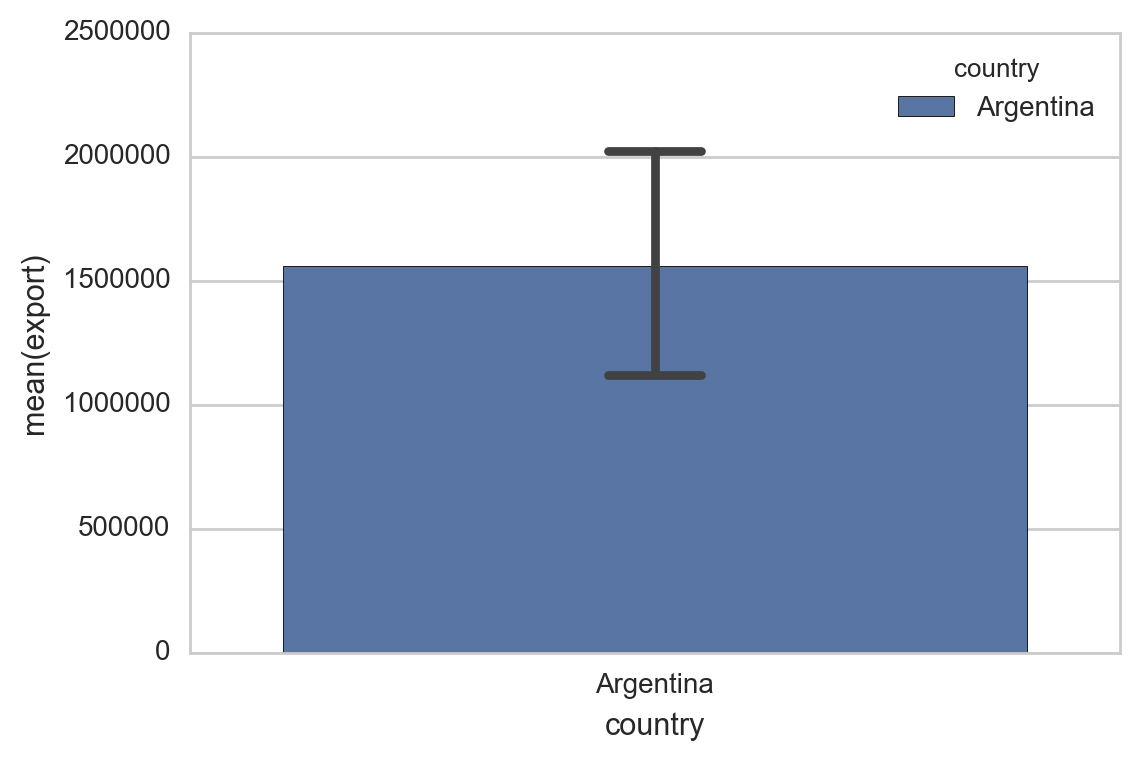

In [52]:
sns.set_style("whitegrid")
tips = df
ax = sns.barplot(x="country",y="export", hue="country", data=tips, capsize=.1)

The above graph shows the total export of Argentina from 1993 to 2012. 

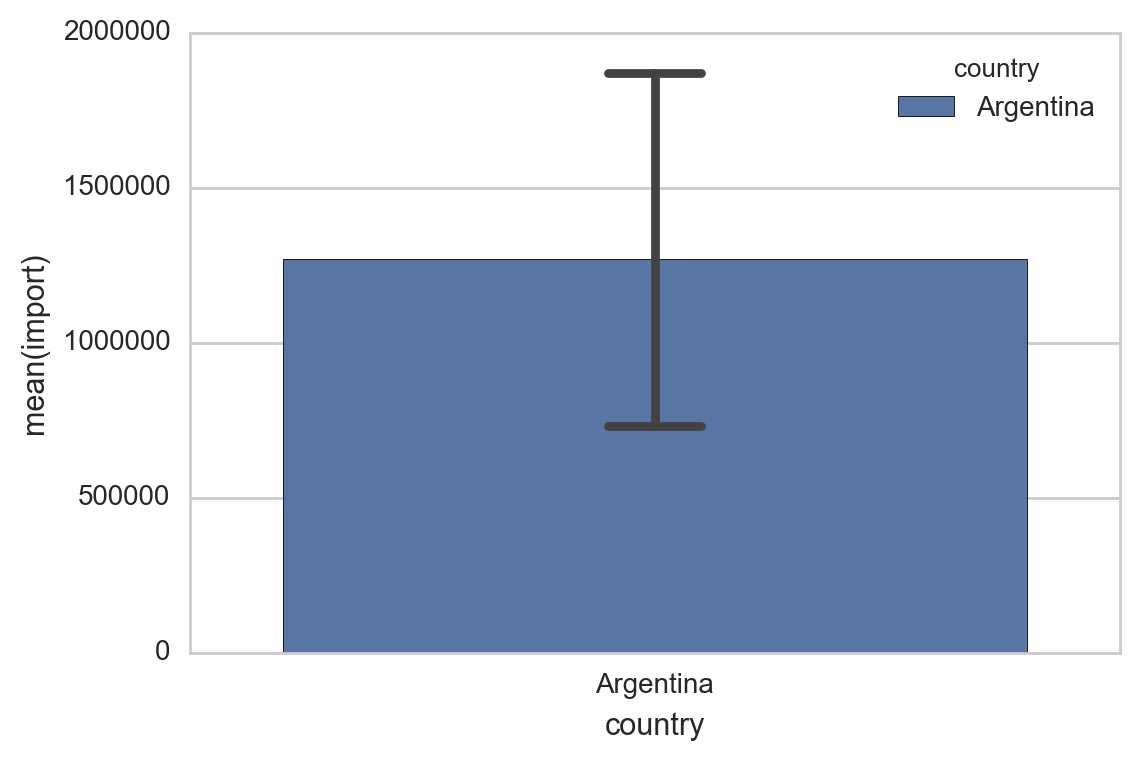

In [50]:
sns.set_style("whitegrid")
tips = df
ax = sns.barplot(x="country",y="import", hue="country", data=tips, capsize=.1)

The above graph shows the total import of Argentina from 1993 to 2012.

In [44]:
import statsmodels.api as sm
est = sm.OLS(y, X)

In [45]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logrgdpcap   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     140.5
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           5.21e-35
Time:                        21:34:40   Log-Likelihood:                 147.89
No. Observations:                 152   AIC:                            -289.8
Df Residuals:                     149   BIC:                            -280.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
logtradeshare    -0.3426      0.046     -7.427      0.000      -0.434      -0.251
logarea          -5.4949      0.390    -14.096      0.000      -6.265      -4.725
logpop            4.1066      0.308     13.353      0.000       3.499       4.714
==============================================================================
Omnibus:                       16.736   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.140
Skew:                          -0.843   Prob(JB):                     6.98e-05
Kurtosis:                       2.578   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
est.params

logtradeshare   -0.342649
logarea         -5.494904
logpop           4.106626
dtype: float64

The above results show that as the log trade share of Argentina increases, the log gdp per capita decreases by 0.34. An increase in the area of the Argentina country decreases the log gdp per capita by 5.49. Population seems to have a positive relation with the log gdp per capita.

Now we I am looking at the trade between Agrentina and its trading partners. Again, I will be using the ols estimation, which has proven to best work and explain the variables in this data. 

In [63]:
#generate tradeshare_partner 
df['tradeshare_partner'] =(df.export + df.Import)/df.GDP_at_current_national_prices  
df.tradeshare_partner

0       0.302046
1       0.120692
2       0.424059
3       5.470383
4      26.987174
5       0.066071
6       0.310255
7       1.208538
8       1.309997
9       7.099131
10      0.094229
11     30.844857
12      0.566744
13      0.367296
14      0.056792
15      0.398793
16      0.835089
17     37.437414
18      1.507826
19      0.394979
20      0.914696
21      7.707737
22      0.092883
23      0.356324
24      1.572134
25      0.973160
26      8.543528
27      0.275279
28     43.879830
29      0.151772
         ...    
122     0.203971
123     0.121870
124     5.485636
125    30.258818
126     0.731709
127     1.279676
128    20.252733
129     4.410152
130     0.192368
131     0.692829
132     0.127214
133     0.683518
134     0.887299
135     0.083092
136     0.080353
137     0.153580
138     0.664637
139     3.727757
140     0.810055
141    22.440195
142     0.058536
143     1.309032
144     0.078856
145    21.459060
146     0.061304
147     0.932631
148     3.223372
149     0.7527

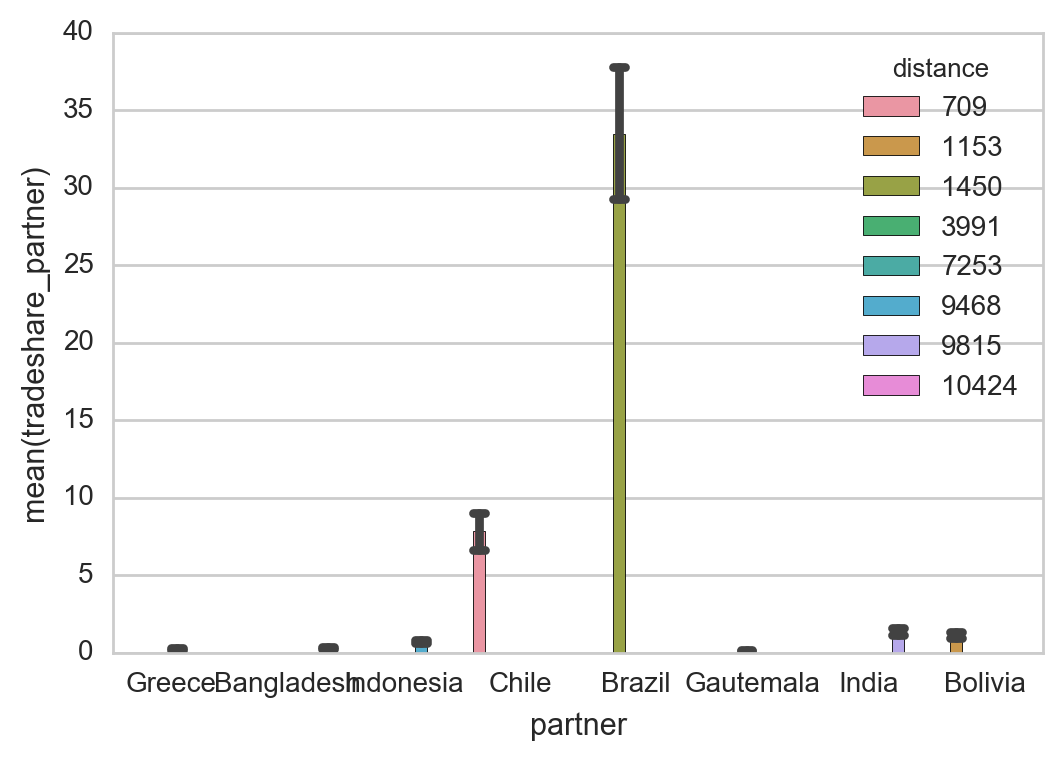

In [68]:
sns.set_style("whitegrid")
tips = df
ax = sns.barplot(x="partner",y="tradeshare_partner", hue="distance", data=tips, capsize=.1)

Looking at the bilateral trade between Argentina and its trade partners, it can be observe that Agrentina trade a lot with brazil and Chile, which are part pf the countries that are closer to it. 

In [69]:
#generate  lntrade_partner
df['lntrade_partner'] = df.tradeshare_partner.apply(np.log)

In [70]:
#generate lnarea_partner
df['lnarea_partner'] = df.landarea.apply(np.log)

In [71]:
#generate lnpop_partner 
df['lnpop_partner'] = df.population.apply(np.log)

In [72]:
#generate lndistance 
df['lndistance'] = df.distance.apply(np.log)

In [76]:
#regress lntrade_partner lnpop lnarea lnarea_partner lnpop_partner lndistance
y1 = df.lntrade_partner
X1 = df[['logarea','logpop','lnarea_partner', 'lnpop_partner', 'lndistance']]


In [77]:
import statsmodels.api as sm
est = sm.OLS(y1, X1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        lntrade_partner   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sun, 16 Apr 2017   Prob (F-statistic):           2.14e-60
Time:                        22:59:18   Log-Likelihood:                -158.78
No. Observations:                 152   AIC:                             327.6
Df Residuals:                     147   BIC:                             342.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
logarea            3.3956      1.331      2.551      0.012       0.766       6.026
logpop            -2.3169      1.046     -2.214      0.028      -4.385      -0.249
lnarea_partner     0.2628      0.083      3.176      0.002       0.099       0.426
lnpop_partner      0.5925      0.083      7.140      0.000       0.429       0.757
lndistance        -1.5071      0.116    -13.001      0.000      -1.736      -1.278
==============================================================================
Omnibus:                        2.040   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                2.009
Skew:                          -0.215   Prob(JB):                        0.366
Kurtosis:                       2.636   Cond. No.                         811.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As observed from the above graph, we can see that the regression results show that the farther the trading partner is, the lower the trade business between them. logpop is negative because it population is big and it tend to trade intranationally.